# Communities and Crime data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

rawdata = pd.read_csv('CommViolPredUnnormalizedData.txt', header = None)
attr = pd.read_csv(open("attrdiscr.txt", "r"),header = None)
# data = rawdata.drop(axis=1,columns=[0,1,2,3])
# 2215 rows × 147 columns
rawdata = rawdata.replace('?', 'NaN')

# Preprocessing:

In [2]:
#detecting missing values

listOfMis = []
for i in rawdata.columns:
    k=0
    for j in rawdata.index:
        if rawdata.iloc[j,i]== "NaN":
            k+=1
    listOfMis.append(k)
    
print(listOfMis)
# data

[0, 0, 1221, 1224, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 1872, 0, 0, 0, 1872, 1872, 1872, 1872, 0, 1872, 0, 0, 208, 208, 1, 1, 13, 13, 3, 3, 3, 3, 3, 3, 91, 91, 221, 97]


In [3]:
#how many attr with missing values
print("number of attr. with missing values=",np.size([i for i in listOfMis if i>0]))

#deleting unnecessary data: 
#deleting unpredictible data (first four attributes): communityname, state, countyCode, communityCode.

listtodel = [0,1,2,3,4] 

#adding attribtes with more than 1800 missing values
# print("more than 1800 of missing values:")
for i in range (np.size(listOfMis)):
    if listOfMis[i]>1800:
#         print(attr.iloc[i,0])
        listtodel.append(i)

#delete other attributes to be predicted (129-146),
#but the last one remain for the prediction - #147 total number of non-violent crimes per 100K popuation 

# for i in range (4,(np.size(listOfMis))):
#     if listOfMis[i]<1800 and listOfMis[i]>0:
#         print(i, listOfMis[i])
#         print(attr.iloc[i,0])


listtodel = listtodel + [i for i in range(129,146)]
print(np.size(listtodel),listtodel)


#putting mean value in the missing values of 30th attribute
dt = np.array(rawdata.iloc[1:2005,30])
dt = np.append(dt, rawdata.iloc[2006:,30])
dt = dt.astype(int)
mean30 = np.mean(dt)

for i in rawdata.index:
    if rawdata.iloc[i,30]=="NaN":
        print(i,"yes")
        rawdata.iloc[i,30] = mean30



number of attr. with missing values= 41
44 [0, 1, 2, 3, 4, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
2005 yes


In [4]:
data = rawdata.drop(axis=1,columns=listtodel)
target = data.iloc[:,102]
nanlist = []
for i in target.index:
    if target[i]=="NaN":
        nanlist.append(i)

training = data.drop(axis=1,columns=146)
#training set without given target value
maintraining = training.loc[nanlist]

#training set with given target value
alldata = data.drop(axis=0,index=nanlist)
training = training.drop(axis=0,index=nanlist)
target = target.drop(axis=0,index=nanlist)


In [36]:
#scaling the data

training = np.array(training)
target = np.array(target)

data_nots = np.array(alldata)
x_data = data_nots[:,:102]
y_data = data_nots[:,102]

scalerst = preprocessing.StandardScaler()
st_data = scalerst.fit_transform(alldata)
x_data_st = st_data[:,:102]
y_data_st = st_data[:,102]

scalermm = preprocessing.MinMaxScaler()
mm_data = scalermm.fit_transform(alldata)
x_data_mm = mm_data[:,:102]
y_data_mm = mm_data[:,102]


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[11980, 3.1, 1.37, ..., 1845.9, 9.63, 0.0],
       [23123, 2.82, 0.8, ..., 2186.7, 3.84, 0.0],
       [29344, 2.43, 0.74, ..., 2780.9, 4.37, 0.0],
       ...,
       [32824, 2.46, 0.52, ..., 1195.2, 0.12, 0.0],
       [13547, 2.89, 3.37, ..., 2142.2, 0.0, 0.0],
       [28898, 2.61, 2.39, ..., 1331.0, 1.39, 0.0]], dtype=object)

# k-fold cross validation

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

 # Linear SVR and epsilon 

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

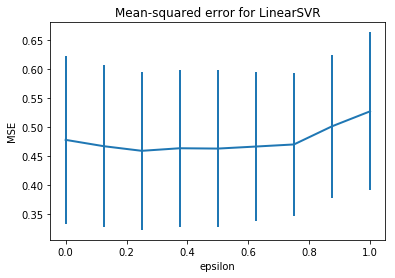

0.4591774408228866 eps for St= 0.25


In [8]:
from sklearn import svm
mean_mse = []
std_mse = []
epsi = np.linspace(0,1,9)
for eps in epsi:
    mse = []
    for train, test in kf.split(x_data_st):
        svr = svm.LinearSVR(epsilon=eps, random_state=0)
        svr.fit(x_data_st[train],y_data_st[train])
        svr_result = svr.predict(x_data_st[test])
        mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))
            
    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))
    

plt.errorbar(epsi, mean_mse, std_mse, lw=2)
# plt.plot(epsi, bestlist, color='red', label = 'Accuracy MinMax')
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for LinearSVR")
plt.savefig("LinearSVRepsilon")
plt.show() 

print(np.amin(mean_mse), "eps for St=", epsi[np.argmin(mean_mse)])
# print(np.amax(bestlist_mm), "eps for MinMax=", epsi[np.argmax(bestlist_mm)])



# SVR kernels

0.4559518722913737 eps for kern= linear 0.5


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

0.9856262359752593 eps for kern= poly 1.0


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

0.4531057297945626 eps for kern= rbf 0.30000000000000004


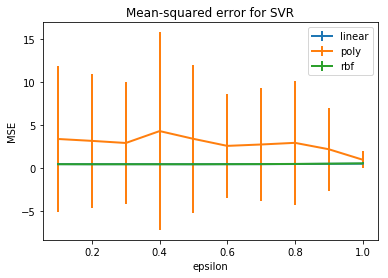

In [9]:
param = ['linear', 'poly', 'rbf']
# param = ['linear', 'poly']
epsi = np.arange(0.1,1.1,0.1)
for i in param:
    mean_mse = []
    std_mse = []
    for eps in epsi:
        mse = []
        for train, test in kf.split(x_data_st):
            svr = svm.SVR(kernel=i, epsilon = eps)
            svr.fit(x_data_st[train],y_data_st[train])
            svr_result = svr.predict(x_data_st[test])
            mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

        std_mse.append(statistics.stdev(mse))
        mean_mse.append(np.mean(mse))
    
    print(np.amin(mean_mse), "eps for kern=", i, epsi[np.argmin(mean_mse)])
    plt.errorbar(epsi, mean_mse, std_mse, label = i, lw=2)
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for SVR")
plt.savefig("SVRepsilon")
plt.show() 



/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

0.4667950818065655 c for kern= linear 0.1


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

0.45138680897851363 c for kern= rbf 1.4000000000000001


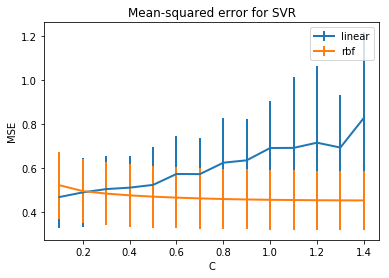

In [20]:
# param = ['linear', 'poly', 'rbf']
param = ['linear', 'rbf']
# param = ['linear', 'poly']
koef = np.arange(0.1,1.5,0.1)
for i in param:
    mean_mse = []
    std_mse = []
    for c in koef:
        mse = []
        for train, test in kf.split(x_data_st):
            svr = svm.SVR(kernel=i, epsilon = 0.5, C=c, max_iter=5000)
            svr.fit(x_data_st[train],y_data_st[train])
            svr_result = svr.predict(x_data_st[test])
            mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

        std_mse.append(statistics.stdev(mse))
        mean_mse.append(np.mean(mse))
    
    print(np.amin(mean_mse), "c for kern=", i, koef[np.argmin(mean_mse)])
    plt.errorbar(koef, mean_mse, std_mse, label = i, lw=2)
plt.xlabel('C')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for SVR")
plt.savefig("SVRc")
plt.show() 



0.4559518722913737 eps for kern= linear 0.5


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

0.4531057297945626 eps for kern= rbf 0.30000000000000004


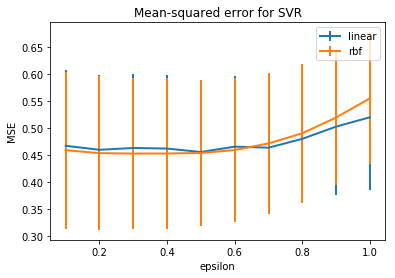

In [11]:
param = ['linear', 'rbf']
# param = ['linear', 'poly']
epsi = np.arange(0.1,1.1,0.1)
for i in param:
    mean_mse = []
    std_mse = []
    for eps in epsi:
        mse = []
        for train, test in kf.split(x_data_st):
            svr = svm.SVR(kernel=i, epsilon = eps)
            svr.fit(x_data_st[train],y_data_st[train])
            svr_result = svr.predict(x_data_st[test])
            mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

        std_mse.append(statistics.stdev(mse))
        mean_mse.append(np.mean(mse))
    
    print(np.amin(mean_mse), "eps for kern=", i, epsi[np.argmin(mean_mse)])
    plt.errorbar(epsi, mean_mse, std_mse, label = i, lw=2)
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for SVR")
plt.savefig("SVRepsilon_lin_rbf")
plt.show() 



# SVR Max iter 

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceW

0.4705160552702097 eps for kern= linear 100000


/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/apustozerova/.local/lib/python3.6/site-p

0.4592993090361879 eps for kern= rbf 5000


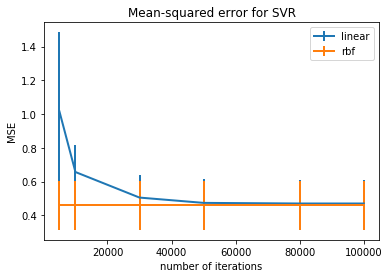

In [10]:
param = ['linear','rbf']
# param = ['linear', 'poly']
iterate = [5000,10000,30000,50000,80000,100000]
for ker in param:
    mean_mse = []
    std_mse = []
    for i in iterate:
        mse = []
        for train, test in kf.split(x_data_st):
            svr = svm.SVR(kernel=ker, max_iter = i)
            svr.fit(x_data_st[train],y_data_st[train])
            svr_result = svr.predict(x_data_st[test])
            mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

        std_mse.append(statistics.stdev(mse))
        mean_mse.append(np.mean(mse))
    
    print(np.amin(mean_mse), "eps for kern=", ker, iterate[np.argmin(mean_mse)])
    plt.errorbar(iterate, mean_mse, std_mse, label = ker, lw=2)
plt.xlabel('number of iterations')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for SVR")
plt.savefig("SVRiter")
plt.show() 


# Linear SVR iterations

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

0.4554092341518916 eps for kern= 5000


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


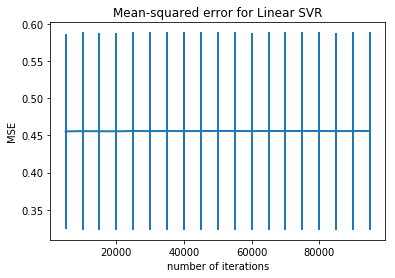

In [12]:
# iterate = [1000,10000,30000,50000,80000,100000,500000,1000000]
# iterate = np.arange(5000,100000,5000)
iterate = np.arange(5000,100000,5000)
mean_mse = []
std_mse = []
for i in iterate:
    mse = []
    for train, test in kf.split(x_data_st):
        svr = svm.LinearSVR(epsilon =0.5, max_iter = i)
        svr.fit(x_data_st[train],y_data_st[train])
        svr_result = svr.predict(x_data_st[test])
        mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "eps for kern=", iterate[np.argmin(mean_mse)])
plt.errorbar(iterate, mean_mse, std_mse, lw=2)

plt.xlabel('number of iterations')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Linear SVR")
plt.savefig("LinearSvriter")
plt.show() 


# AUTO ML SVR

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import components

estim = HyperoptEstimator(regressor=components.svr('regressor')) # only for svr
estim.fit(x_data_st, y_data_st)
print(estim.best_model())

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase th

Mean= 0.4604369934098015 Mean auto 0.46109074380420945


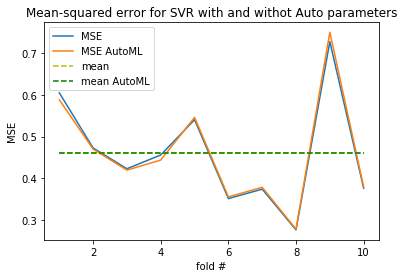

In [13]:
mse_auto = []
mse = []
for train, test in kf.split(x_data_st):
    svr_auto = svm.SVR(C=0.9632339970765483, cache_size=512, coef0=0.0, degree=1, epsilon=0.28332954729965165, gamma='auto', kernel='linear', max_iter=44336566.0, shrinking=False, tol=1.84993035722754e-05, verbose=False)
    svr_auto.fit(x_data_st[train],y_data_st[train])
    svr_auto_result = svr_auto.predict(x_data_st[test])
    mse_auto.append(metrics.mean_squared_error(y_data_st[test], svr_auto_result))
    
    svr = svm.LinearSVR(epsilon =0.5)
    svr.fit(x_data_st[train],y_data_st[train])
    svr_result = svr.predict(x_data_st[test])
    mse.append(metrics.mean_squared_error(y_data_st[test], svr_result))

x = np.arange(1,11,1)
M = np.mean(mse)
y_M = np.tile(M,10)
MA = np.mean(mse_auto)
y_MA = np.tile(MA,10)

print("Mean=",M,'Mean auto',MA)

plt.plot(x, mse, label = 'MSE')
plt.plot(x, mse_auto, label = 'MSE AutoML')
plt.plot(x, y_M, 'y--', label = 'mean')
plt.plot(x, y_MA, 'g--', label = 'mean AutoML')


plt.xlabel('fold #')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for SVR with and withot Auto parameters")
plt.savefig("SvrAuto_defiter")
plt.show() 

# Lasso

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apusto

0.4627953805647701 aplha for kern= 95000 0.0


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


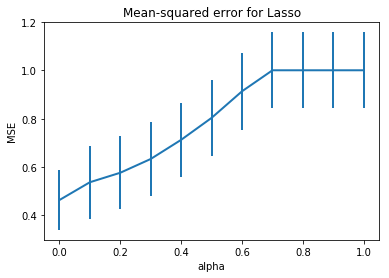

In [14]:
from sklearn import linear_model

alph = np.arange(0,1.1,0.1)
mean_mse = []
std_mse = []
for a in alph:
    mse = []
    for train, test in kf.split(x_data_st):
        glm = linear_model.Lasso(alpha = a)
        glm.fit(x_data_st[train],y_data_st[train])
        glm_result = glm.predict(x_data_st[test])
        mse.append(metrics.mean_squared_error(y_data_st[test], glm_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "aplha for kern=", i, alph[np.argmin(mean_mse)])
plt.errorbar(alph, mean_mse, std_mse, lw=2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Lasso")
plt.savefig("LassoAlpha")
plt.show() 

# Lasso for unscaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apusto

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

3471641.3410606524 aplha for kern= rbf 0.1


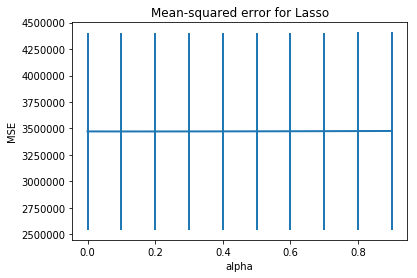

In [54]:
from sklearn import linear_model

alph = np.arange(0,1,0.1)
mean_mse = []
std_mse = []
for a in alph:
    mse = []
    for train, test in kf.split(x_data):
        glm = linear_model.Lasso(alpha = a)
        glm.fit(x_data[train],y_data[train])
        glm_result = glm.predict(x_data[test])
        mse.append(metrics.mean_squared_error(y_data[test], glm_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "aplha for kern=", i, alph[np.argmin(mean_mse)])
plt.errorbar(alph, mean_mse, std_mse, lw=2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Lasso")
plt.savefig("LassoAlpha_unscaled")
plt.show() 

# Lasso for MINmax

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apusto

0.004761783995441358 with aplha 0.0


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


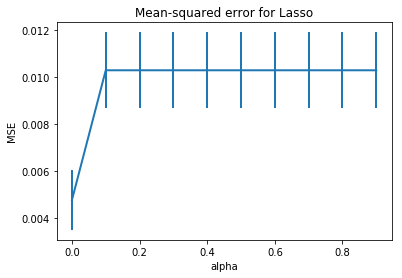

In [53]:
from sklearn import linear_model

alph = np.arange(0,1,0.1)
mean_mse = []
std_mse = []
for a in alph:
    mse = []
    for train, test in kf.split(x_data_mm):
        glm = linear_model.Lasso(alpha = a, precompute=False)
        glm.fit(x_data_mm[train],y_data_mm[train])
        glm_result = glm.predict(x_data_mm[test])
        mse.append(metrics.mean_squared_error(y_data_mm[test], glm_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "with aplha", alph[np.argmin(mean_mse)])
plt.errorbar(alph, mean_mse, std_mse, lw=2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Lasso")
plt.savefig("LassoAlpha_mimax")
plt.show() 

# Feature selection

In [60]:
from sklearn import feature_selection

selector = feature_selection.VarianceThreshold(threshold=0.5)
sel = selector.fit_transform(x_data)

sel.shape

(2118, 94)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/apusto

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

0.46587466392909516 aplha for kern= rbf 0.0


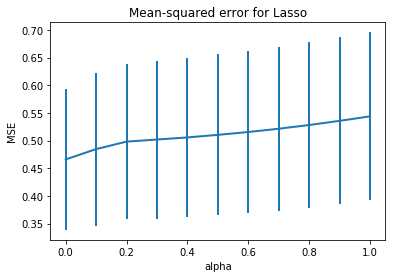

In [62]:
from sklearn import linear_model

alph = np.arange(0,1.1,0.1)
mean_mse = []
std_mse = []
for a in alph:
    mse = []
    for train, test in kf.split(sel):
        glm = linear_model.Lasso(alpha = a)
        glm.fit(sel[train],y_data_st[train])
        glm_result = glm.predict(sel[test])
        mse.append(metrics.mean_squared_error(y_data_st[test], glm_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "aplha for kern=", i, alph[np.argmin(mean_mse)])
plt.errorbar(alph, mean_mse, std_mse, lw=2)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Lasso")
plt.savefig("LassoAlpha_selected")
plt.show() 

# AutoML lasso

# MLP

/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/apustozerova/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5476567194192794 iter = rbf 300


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


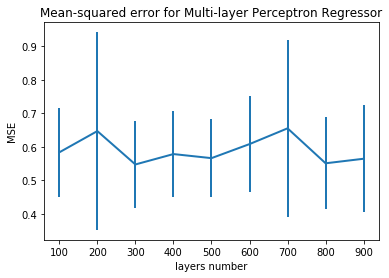

In [73]:
from sklearn import neural_network

layers = np.arange(100,1000,100)
mean_mse = []
std_mse = []
for hl in layers:
    mse = []
    for train, test in kf.split(x_data_st):
        mlp = neural_network.MLPRegressor(hidden_layer_sizes = hl)
        mlp.fit(x_data_st[train],y_data_st[train])
        mlp_result = mlp.predict(x_data_st[test])
        mse.append(metrics.mean_squared_error(y_data_st[test], mlp_result))

    std_mse.append(statistics.stdev(mse))
    mean_mse.append(np.mean(mse))

print(np.amin(mean_mse), "iter =", i, layers[np.argmin(mean_mse)])
plt.errorbar(layers, mean_mse, std_mse, lw=2)
plt.xlabel('layers number')
plt.ylabel('MSE')
plt.legend()
plt.title("Mean-squared error for Multi-layer Perceptron Regressor")
plt.savefig("MLPlayers")
plt.show() 